In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import io
import numpy as np
from PIL import Image

from bootstrap import get_captcha, check_captcha, login
from predict import prediction
from preprocess_v3 import gen_images

In [5]:
login()

login


In [6]:
def step(file_name = None):
    if file_name is None:
        rawim = get_captcha()
        im = Image.open(io.BytesIO(rawim))
    else:
        im = Image.open(file_name)
    
    show_images = gen_images(im, False).squeeze()
    ans = prediction(gen_images(im))
    
    if file_name is None:
        succ = check_captcha(ans)
        print('Pred: %s'%(ans), 'Correct!' if succ else 'Failed!')
    else:
        print('Pred: %s'%(ans))

    im.seek(15)
    plt.figure(12)
    plt.subplot(2, 1, 1)
    img4 = Image.new("RGB", im.size)
    img4.paste(im)
    img4 = np.array(im)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.imshow(im)

    for i in range(4):
        plt.subplot(2, 4, 5 + i)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.imshow(show_images[i], cmap='gray')
        plt.title(ans[i], y=-0.3)

Pred: L7GP Correct!


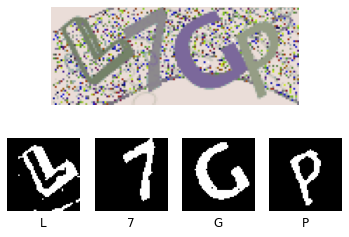

In [7]:
step()

Pred: DFXW


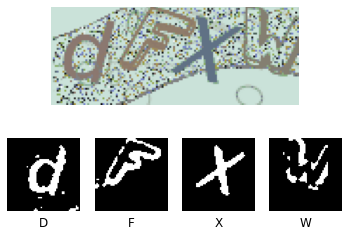

In [9]:
# 这个gif的X会变色，旧算法的第4个图同时包含X与W，有一定影响

step('../dfxa=1615033806517-419.gif')
# step('bootstrap_img_fail/5MAM=1615436100327-258.gif')